In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# データの準備
num_data = 30
random_seed = 0
np.set_printoptions(10)
np.random.seed(random_seed)

# 学習データ作成
x = np.linspace(-np.pi, +np.pi, num_data)
x_star = np.linspace(-1.5 * np.pi, + 1.5 * np.pi, num_data)
y = np.sin(x) * 2
y += np.random.normal(scale=0.1, size=y.shape)

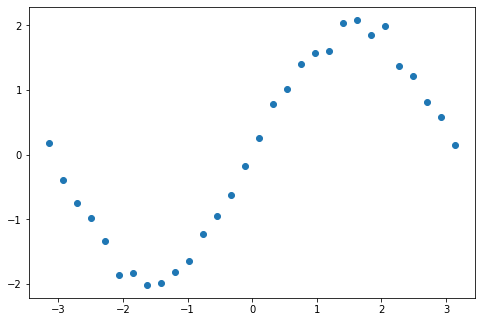

In [3]:
# 学習データの描画
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y)
ax.set_aspect('equal')
plt.savefig("ahi")

In [4]:
# X 行列，X* 行列の作成
X = np.concatenate((np.ones((num_data, 1)), x[:, np.newaxis]), axis=1)
X_star = np.concatenate((np.ones((num_data, 1)), x_star[:, np.newaxis], ), axis=1)
print(X[:5])

[[ 1.           -3.1415926536]
 [ 1.           -2.9249310913]
 [ 1.           -2.708269529 ]
 [ 1.           -2.4916079666]
 [ 1.           -2.2749464043]]


In [5]:
# 描画関数
def show(X, y, X_star, y_hat, title, save=False):
    fig, ax = plt.subplots(figsize=(6, 6))
    fig.tight_layout()
    ax.scatter(x, y, label="train", c="b")
    ax.plot(X_star[:, 1], y_hat, label="pred", c="r")
    ax.set_title(title)
    ax.set_aspect('equal')
    ax.legend()
    if save:
        plt.show()
    else:
        plt.savefig(f'{title}.png', pad_inches = 0)

## 線形回帰

In [6]:
# Linear Regression
def predict_with_lr(X, y):
    a = np.linalg.inv(X.T @ X) @ X.T @ y
    return X_star @ a

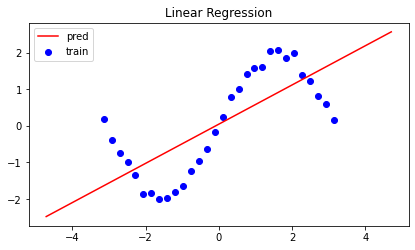

In [7]:
y_hat = predict_with_lr(X, y)
show(X, y, X_star, y_hat, f"Linear Regression")

## 局所線形回帰

In [8]:
# Local Linear Regression
def predict_with_llr(X, y, sigma):
    k = lambda x1, x2: np.exp(- np.linalg.norm(x1 - x2)**2 / (2 * sigma**2))

    y_hat = np.empty(shape=(X_star.shape[0], 1))
    for i, x_star in enumerate(X_star):
        W = np.diag(np.array([k(x_star, x_i) for x_i in X]))
        a = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y
        y_hat[i] = x_star.T @ a
    
    return y_hat

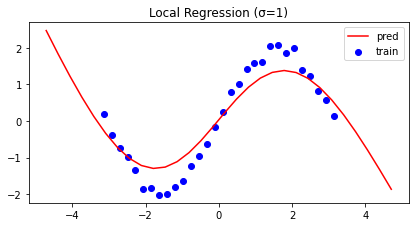

In [10]:
sigma = 1
y_hat = predict_with_llr(X, y, sigma)
show(X, y, X_star, y_hat, f"Local Regression (σ={sigma})")